In [64]:
import pickle
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
def T(ba,ca):
    return( (1-ba**2)/(1-ca**2) )
    


SimFilePath = ['../SimulationInfo.BW.pickle','../SimulationInfo.RDZ.pickle']
MassPath = ['../../Data/BasicData/Marvel_DCJL.Masses.pickle','../../Data/BasicData/RDZ.Masses.pickle']
HaloTypePath = ['../../Data/BasicData/HaloTypes.txt','../../Data/BasicData/HaloTypes.RDZ.txt']
feedback = ['BW','RDZ']

def LoadSimData(SimFilePath,MassPath,HaloTypePath,feedback=['BW']):
    cens,sats,bsps = [],[],[]
    pB_c,pC_c,mB_c,mC_c,pT_c,mT_c,M_c = [],[],[],[],[],[],[]
    pB_s,pC_s,mB_s,mC_s,pT_s,mT_s,M_s = [],[],[],[],[],[],[]
    for i in range(0,len(SimFilePath)):
        mass_data = pickle.load(open(MassPath[i],'rb'))
        SimInfo = pickle.load(open(SimFilePath[i],'rb'))
        
        

        dataframe = pd.read_csv(HaloTypePath[i], sep='\s+')

        # Iterate through the rows of the dataframe
        for _, row in dataframe.iterrows():
            volume = row['Volume']
            halo_id = int(row['HaloGRP@z0'])
            halo_type = row['HaloType']

            # Check conditions and append to lists accordingly
            if volume in SimInfo:
                if halo_type == 'Central' and halo_id in SimInfo[volume]['goodhalos']:
                    cens.append((volume, halo_id))
                elif halo_type == 'Satellite' and halo_id in SimInfo[volume]['goodhalos']:
                    sats.append((volume, halo_id))
                    #print('Satellite',(volume, halo_id))
                elif halo_type == 'Backsplash' and halo_id in SimInfo[volume]['goodhalos']:
                    bsps.append((volume, halo_id))
                    #print('Satellite')
        
    
        
        for sim in SimInfo:
            try:
                prof = pickle.load(open(f'../../Data/{sim}.{feedback[i]}.Profiles.pickle','rb'))
                pynb = pickle.load(open(f'../../Data/{sim}.{feedback[i]}.3DShapes.pickle','rb'))

                print
                mcmc = pickle.load(open(f'../../Data/{sim}.{feedback[i]}.MCMC.pickle','rb'))
            except FileNotFoundError:
                print(f'Missing file: in sim,feedback {sim}{feedback[i]}')
                continue
            for halo in SimInfo[sim]['goodhalos']:
                Reff = prof[str(halo)]['x000y000']['Reff']
                if (sim,int(halo)) in sats:
                    try:    
                        #print('sats')
                        #ind_eff = np.argmin(abs(pynb[str(halo)]['rbins']-Reff))
                        b = float(pynb[str(halo)]['ba_smooth'](Reff))
                        c = float(pynb[str(halo)]['ca_smooth'](Reff))
                        pB_s.append(b)
                        pC_s.append(c)
                        pT_s.append(T(b,c))
                    except:
                        print(traceback.format_exc())
                        pB_s.append(np.NaN)
                        pC_s.append(np.NaN)
                        pT_s.append(np.NaN)
                    try:
                        b = mcmc[str(halo)]['Isophote']['alpha_50'][0]
                        c = mcmc[str(halo)]['Isophote']['alpha_50'][1]
                        mB_s.append(b)
                        mC_s.append(c)
                        mT_s.append(T(b,c))
                    except:
                        mB_s.append(np.NaN)
                        mC_s.append(np.NaN)
                        mT_s.append(np.NaN)
                    M_s.append(np.log10(mass_data[sim][str(halo)]['Mstar']))
                else:
                    try:    
                        #ind_eff = np.argmin(abs(pynb[str(halo)]['rbins']-Reff))
                        b = float(pynb[str(halo)]['ba_smooth'](Reff))
                        c = float(pynb[str(halo)]['ca_smooth'](Reff))
                        pB_c.append(b)
                        pC_c.append(c)
                        pT_c.append(T(b,c))
                    except:
                        print(traceback.format_exc())
                        pB_c.append(np.NaN)
                        pC_c.append(np.NaN)
                        pT_c.append(np.NaN)
                    try:
                        b = mcmc[str(halo)]['Isophote']['alpha_50'][0]
                        c = mcmc[str(halo)]['Isophote']['alpha_50'][1]
                        mB_c.append(b)
                        mC_c.append(c)
                        mT_c.append(T(b,c))
                    except:
                        mB_c.append(np.NaN)
                        mC_c.append(np.NaN)
                        mT_c.append(np.NaN)
                    M_c.append(np.log10(mass_data[sim][str(halo)]['Mstar']))

    print((pB_c),(mB_c))
    return pB_s,pC_s,pT_s,pB_s,pC_s,pT_s,mB_s,mC_s,mT_s,mB_s,\
                    mC_s,mT_s,M_s,pB_c,pC_c,pT_c,pB_c,pC_c,pT_c,\
                    mB_c,mC_c,mT_c,mB_c,mC_c,mT_c,M_c,cens,sats,bsps


In [65]:
 pB_s,pC_s,pT_s,pB_s,pC_s,pT_s,mB_s,mC_s,mT_s,mB_s,mC_s,mT_s,M_s,pB_c,pC_c,pT_c,pB_c,pC_c,pT_c,mB_c,mC_c,mT_c,mB_c,mC_c,mT_c,M_c,cens,sats,bsps = \
LoadSimData(SimFilePath,MassPath,HaloTypePath,feedback)

Traceback (most recent call last):
  File "/tmp/ipykernel_564173/1824010913.py", line 84, in LoadSimData
    b = float(pynb[str(halo)]['ba_smooth'](Reff))
KeyError: 'ba_smooth'

Traceback (most recent call last):
  File "/tmp/ipykernel_564173/1824010913.py", line 60, in LoadSimData
    b = float(pynb[str(halo)]['ba_smooth'](Reff))
KeyError: 'ba_smooth'

Traceback (most recent call last):
  File "/tmp/ipykernel_564173/1824010913.py", line 60, in LoadSimData
    b = float(pynb[str(halo)]['ba_smooth'](Reff))
KeyError: 'ba_smooth'

Traceback (most recent call last):
  File "/tmp/ipykernel_564173/1824010913.py", line 84, in LoadSimData
    b = float(pynb[str(halo)]['ba_smooth'](Reff))
KeyError: 'ba_smooth'

Traceback (most recent call last):
  File "/tmp/ipykernel_564173/1824010913.py", line 60, in LoadSimData
    b = float(pynb[str(halo)]['ba_smooth'](Reff))
KeyError: 'ba_smooth'

Traceback (most recent call last):
  File "/tmp/ipykernel_564173/1824010913.py", line 60, in LoadSimData
    b

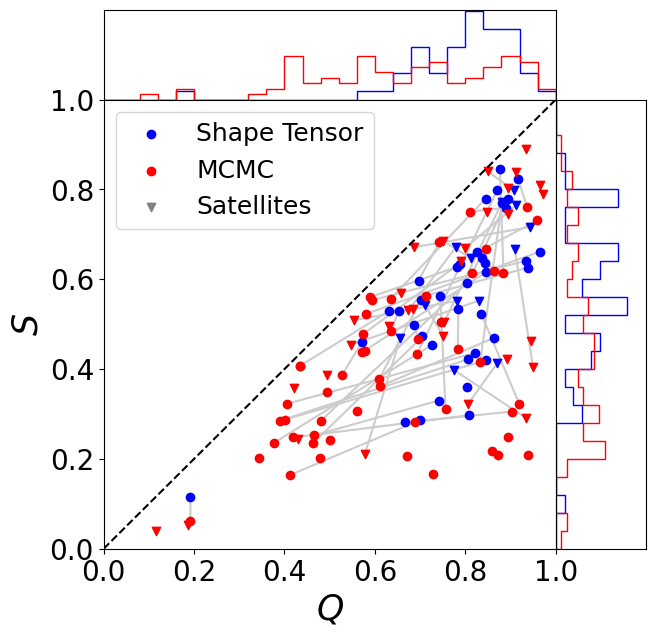

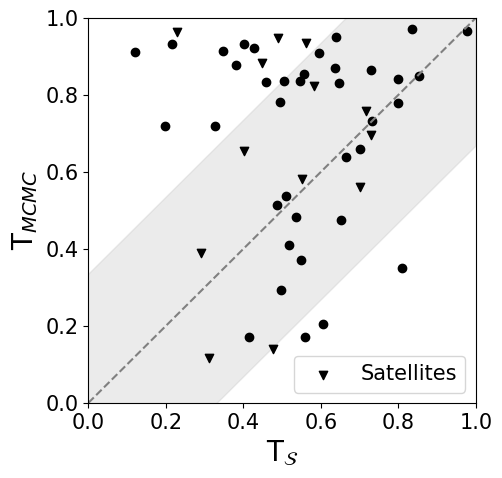

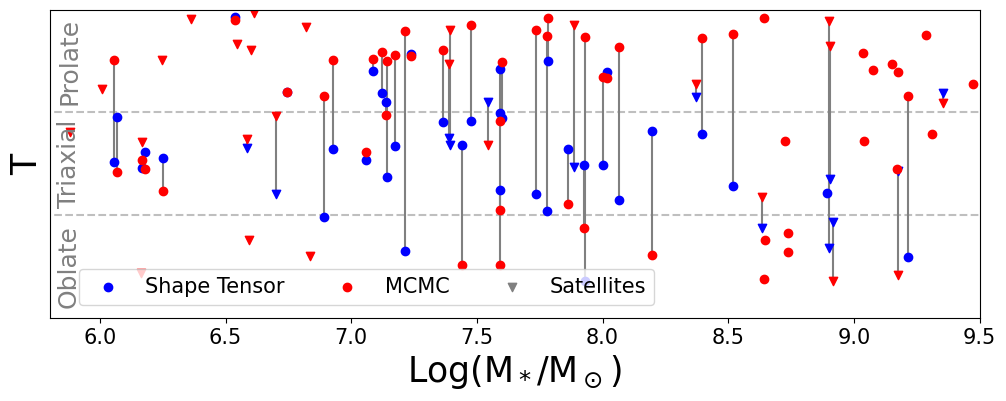

In [41]:
# C/A vs B/A
f,ax = plt.subplot_mosaic([['B','B','B','B','B','.'],
                           ['S','S','S','S','S','C'],
                           ['S','S','S','S','S','C'],
                           ['S','S','S','S','S','C'],
                           ['S','S','S','S','S','C'],
                           ['S','S','S','S','S','C']],figsize=(7,7))
plt.subplots_adjust(hspace=0,wspace=0)
ax['S'].set_xlabel(r'$Q$',fontsize=25)
ax['S'].set_ylabel(r'$S$',fontsize=25)
ax['S'].tick_params(which='both',labelsize=20)
ax['S'].plot([0,1],[0,1],c='k',linestyle='--')
for p in ['B','C','S']:
    ax[p].set_xlim([0,1])
    ax[p].set_ylim([0,1])
    if not p=='S':
        ax[p].set_xticks([])
        ax[p].set_yticks([])
ax['B'].set_ylim([0,5])
ax['C'].set_xlim([0,5])

ax['S'].scatter(pB_c,pC_c,c='b',label='Shape Tensor')
ax['S'].scatter(pB_s,pC_s,c='b',marker='v')
ax['S'].scatter(mB_c,mC_c,c='r',label='MCMC')
ax['S'].scatter(mB_s,mC_s,c='r',marker='v')
ax['S'].scatter(-1,-1,c='.5',marker='v',label='Satellites')

bins = np.linspace(0,1,26)
ax['B'].hist(pB_s+pB_c,bins,histtype='step',edgecolor='b',density=True)
ax['B'].hist(mB_s+mB_c,bins,histtype='step',edgecolor='r',density=True)
ax['C'].hist(pC_s+pC_c,bins,histtype='step',edgecolor='b',density=True,orientation="horizontal")
ax['C'].hist(mC_s+mC_c,bins,histtype='step',edgecolor='r',density=True,orientation="horizontal")

ax['S'].legend(loc='upper left',prop={'size':18})
f.savefig(f'../../Figures/MCMC/PynbodyMCMCComparison.png',bbox_inches='tight',pad_inches=.1)

ax['S'].plot([pB_c,mB_c],[pC_c,mC_c],c='.8',zorder=0)
ax['S'].plot([pB_s,mB_s],[pC_s,mC_s],c='.8',zorder=0)
f.savefig(f'../../Figures/MCMC/PynbodyMCMCComparison.Links.png',bbox_inches='tight',pad_inches=.1)



#T vs T
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.fill_between([0,1],[-1/3,2/3],[1/3,4/3],color='0.75',alpha=.3)
ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_xlabel(r'T$_\mathcal{S}$',fontsize=20)
ax.set_ylabel(r'T$_{MCMC}$',fontsize=20)
ax.tick_params(which='both',labelsize=15)

ax.scatter(pT_c,mT_c,c='k')
ax.scatter(pT_s,mT_s,c='k',marker='v',label='Satellites')

ax.legend(loc='lower right',prop={'size':15})
f.savefig(f'../../Figures/MCMC/PynbodyMCMCComparison.Triaxility.png',bbox_inches='tight',pad_inches=.1)
#plt.close()


#T vs Mstar
f,ax=plt.subplots(1,1,figsize=(12,4))
ax.set_xlim([5.8,9.5])
ax.set_ylim([0,1])
ax.set_yticks([])
ax.set_xlabel(r'Log(M$_*$/M$_\odot$)',fontsize=25)
ax.set_ylabel('T',fontsize=25)
ax.plot([4,9.5],[1/3,1/3],c='.75',linestyle='--',zorder=0)
ax.plot([4,9.5],[2/3,2/3],c='.75',linestyle='--',zorder=0)
ax.tick_params(which='both',labelsize=15)
ax.text(5.83,1/6,'Oblate',fontsize=18,rotation='vertical',verticalalignment='center',c='.5')
ax.text(5.83,3/6,'Triaxial',fontsize=18,rotation='vertical',verticalalignment='center',c='.5')
ax.text(5.83,5/6,'Prolate',fontsize=18,rotation='vertical',verticalalignment='center',c='.5')

#pT,mT = np.array(pT),np.array(mT)
for i in np.arange(len(M_c)):
    ax.axvline(M_c[i],ymin=min([mT_c[i],pT_c[i]]),ymax=max([mT_c[i],pT_c[i]]),c='.5',zorder=0)
for i in np.arange(len(M_s)):
    ax.axvline(M_s[i],ymin=min([mT_s[i],pT_s[i]]),ymax=max([mT_s[i],pT_s[i]]),c='.5',zorder=0)
ax.scatter(M_c,pT_c,c='b',label='Shape Tensor')
ax.scatter(M_s,pT_s,c='b',marker='v')
ax.scatter(M_c,mT_c,c='r',label='MCMC')
ax.scatter(M_s,mT_s,c='r',marker='v')
ax.scatter(0,0,c='.5',marker='v',label='Satellites')

ax.legend(prop={'size':15},ncol=3,loc='center left', bbox_to_anchor=(0.02,0.1))
f.savefig(f'../../Figures/MCMC/TvsMstar.MCMC.png',bbox_inches='tight',pad_inches=.1)